# Fama French Regression
$ R_i - R_f = \beta_{mkt}(R_{mkt} - R_f) + \beta_{smb}SMB + \beta_{hml}HML + \epsilon_i $

Adapted from: https://youtu.be/pLyatGMTqzY?feature=shared

In [ ]:
!pip install statsmodels

In [81]:
# import pandas_datareader.data as reader
import pandas as pd
import datetime as dt
import statsmodels.api as sm
import yfinance as yf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [82]:
# time period and funds
end = dt.date(2023,12,31)
start = dt.date(end.year-5, end.month, end.day)
funds = ['VGT']

In [79]:
# fetch fund return data
funds_returns = yf.download(funds, start=start, end=end)['Adj Close'].pct_change()
funds_returns

[*********************100%***********************]  1 of 1 completed


Date
2018-12-31         NaN
2019-01-02    0.000599
2019-01-03   -0.049422
2019-01-04    0.043484
2019-01-07    0.011173
                ...   
2023-12-22    0.000973
2023-12-26    0.004942
2023-12-27    0.000967
2023-12-28    0.000658
2023-12-29   -0.005731
Name: Adj Close, Length: 1259, dtype: float64

In [61]:
# resample to monthly period, much less data points
funds_returns = funds_returns.resample('M').agg(lambda x: (x+1).prod() - 1)
funds_returns = funds_returns[1:]

funds_returns

Date
2019-01-31    0.079902
2019-02-28    0.073268
2019-03-31    0.040712
2019-04-30    0.063699
2019-05-31   -0.088796
2019-06-30    0.087746
2019-07-31    0.035374
2019-08-31   -0.021937
2019-09-30    0.013212
2019-10-31    0.037532
2019-11-30    0.055938
2019-12-31    0.039673
2020-01-31    0.038105
2020-02-29   -0.072901
2020-03-31   -0.097297
2020-04-30    0.142048
2020-05-31    0.078636
2020-06-30    0.070382
2020-07-31    0.059417
2020-08-31    0.111356
2020-09-30   -0.048668
2020-10-31   -0.043218
2020-11-30    0.125306
2020-12-31    0.057149
2021-01-31   -0.007038
2021-02-28    0.014802
2021-03-31    0.007393
2021-04-30    0.051466
2021-05-31   -0.012362
2021-06-30    0.072764
2021-07-31    0.033703
2021-08-31    0.035103
2021-09-30   -0.057443
2021-10-31    0.081911
2021-11-30    0.031164
2021-12-31    0.025248
2022-01-31   -0.078377
2022-02-28   -0.043457
2022-03-31    0.032845
2022-04-30   -0.118325
2022-05-31   -0.016612
2022-06-30   -0.094027
2022-07-31    0.133670
2022-0

Now we have $ R_i $ from:

$ R_i - R_f = \beta_{mkt}(R_{mkt} - R_f) + \beta_{smb}SMB + \beta_{hml}HML + \epsilon_i $

Since $ R_f, SMB, HML $ is variable, we need to get the data for these as well.

Data sourced from: https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

In [62]:
# load data from file
factors_df = pd.read_csv('F-F_Research_Data_Factors-EDITED.csv', index_col=0)
# set index to datetime
factors_df.index = pd.to_datetime(factors_df.index, format='%Y%m')
# only need the data within our start and end date
factors_df = factors_df.loc[start:end]
factors_df[['Mkt-RF', 'SMB', 'HML', 'RF']] = factors_df[['Mkt-RF', 'SMB', 'HML', 'RF']]/100
print(factors_df.shape, funds_returns.shape)
factors_df

(60, 4) (60,)


,Mkt-RF,SMB,HML,RF
2019-01-01,0.0840,0.0290,-0.0046,0.0021
2019-02-01,0.0340,0.0205,-0.0267,0.0018
2019-03-01,0.0110,-0.0305,-0.0417,0.0019
2019-04-01,0.0397,-0.0174,0.0215,0.0021
2019-05-01,-0.0694,-0.0132,-0.0237,0.0021
2019-06-01,0.0693,0.0029,-0.0071,0.0018
2019-07-01,0.0119,-0.0193,0.0048,0.0019
2019-08-01,-0.0258,-0.0238,-0.0478,0.0016
2019-09-01,0.0143,-0.0096,0.0675,0.0018
2019-10-01,0.0206,0.0029,-0.0191,0.0016


In [63]:
funds_returns.index = factors_df.index

In [83]:
# since we drop the first row, we need to do the same for the factors data
# and then add the new column
factors_df = factors_df[1:]
factors_df['VGT_return'] = funds_returns
factors_df

,Mkt-RF,SMB,HML,RF,VGT_return,excess_return
2019-03-01,0.0110,-0.0305,-0.0417,0.0019,0.006413,0.038812
2019-04-01,0.0397,-0.0174,0.0215,0.0021,0.014006,0.061599
2019-05-01,-0.0694,-0.0132,-0.0237,0.0021,-0.003843,-0.090896
2019-06-01,0.0693,0.0029,-0.0071,0.0018,NaN,0.085946
2019-07-01,0.0119,-0.0193,0.0048,0.0019,0.014652,0.033474
2019-08-01,-0.0258,-0.0238,-0.0478,0.0016,-0.005038,-0.023537
2019-09-01,0.0143,-0.0096,0.0675,0.0018,NaN,0.011412
2019-10-01,0.0206,0.0029,-0.0191,0.0016,-0.009000,0.035932
2019-11-01,0.0387,0.0077,-0.0202,0.0012,0.013012,0.054738
2019-12-01,0.0277,0.0073,0.0175,0.0014,NaN,0.038273


In [84]:
# lets add a column Ri - Rf for convenience
factors_df['excess_return'] = factors_df['VGT_return'] - factors_df['RF']
factors_df

,Mkt-RF,SMB,HML,RF,VGT_return,excess_return
2019-03-01,0.0110,-0.0305,-0.0417,0.0019,0.006413,0.004513
2019-04-01,0.0397,-0.0174,0.0215,0.0021,0.014006,0.011906
2019-05-01,-0.0694,-0.0132,-0.0237,0.0021,-0.003843,-0.005943
2019-06-01,0.0693,0.0029,-0.0071,0.0018,NaN,NaN
2019-07-01,0.0119,-0.0193,0.0048,0.0019,0.014652,0.012752
2019-08-01,-0.0258,-0.0238,-0.0478,0.0016,-0.005038,-0.006638
2019-09-01,0.0143,-0.0096,0.0675,0.0018,NaN,NaN
2019-10-01,0.0206,0.0029,-0.0191,0.0016,-0.009000,-0.010600
2019-11-01,0.0387,0.0077,-0.0202,0.0012,0.013012,0.011812
2019-12-01,0.0277,0.0073,0.0175,0.0014,NaN,NaN


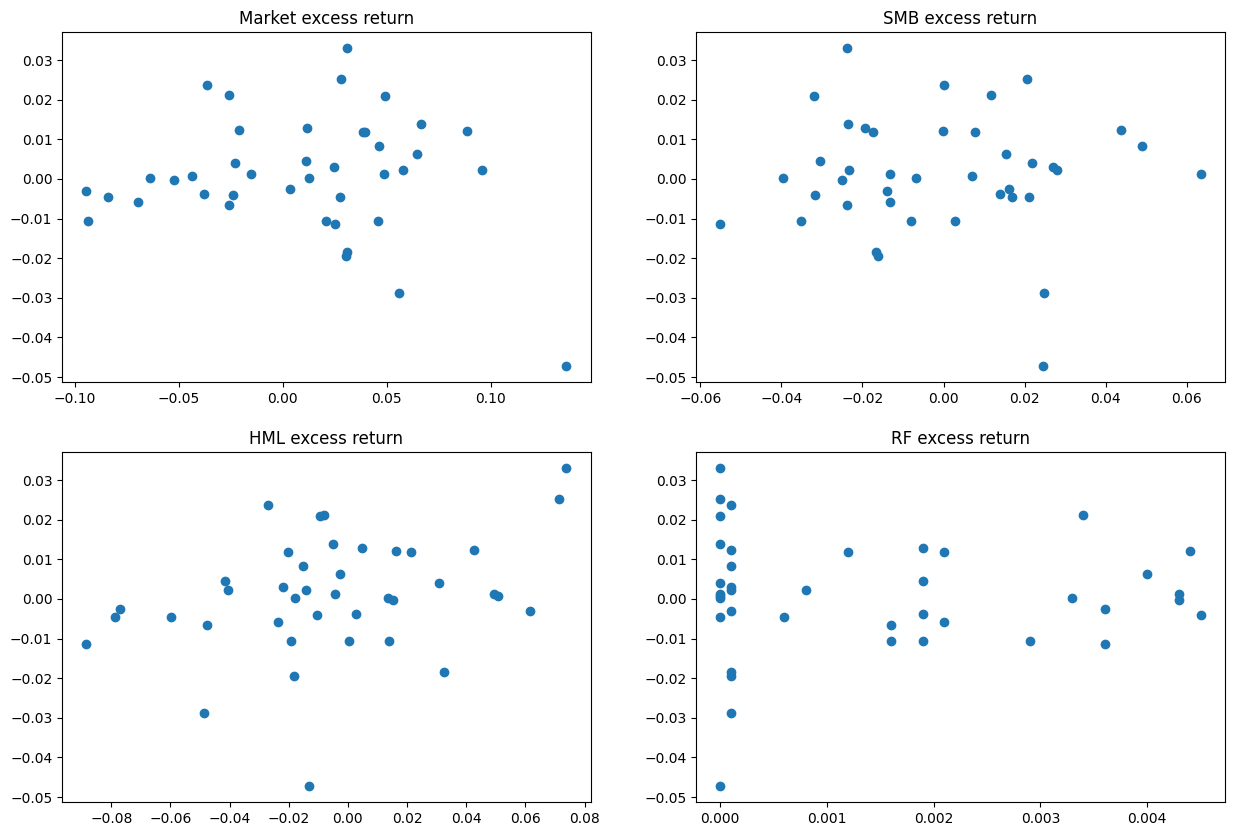

In [85]:
# check linearity between factors and excess return

# lets plot the data
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.scatter(factors_df['Mkt-RF'], factors_df['excess_return'])
plt.title('Market excess return')
plt.subplot(2,2,2)
plt.scatter(factors_df['SMB'], factors_df['excess_return'])
plt.title('SMB excess return')
plt.subplot(2,2,3)
plt.scatter(factors_df['HML'], factors_df['excess_return'])
plt.title('HML excess return')
plt.subplot(2,2,4)
plt.scatter(factors_df['RF'], factors_df['excess_return'])
plt.title('RF excess return')
plt.show()


In [69]:
# lets check the correlations
factors_df[['Mkt-RF', 'SMB', 'HML', 'RF']].corr()

,Mkt-RF,SMB,HML,RF
Mkt-RF,1.000000,0.318823,0.060151,-0.045465
SMB,0.318823,1.000000,0.058368,-0.100457
HML,0.060151,0.058368,1.000000,-0.104890
RF,-0.045465,-0.100457,-0.104890,1.000000


In [75]:
# let's make the model
y = factors_df['excess_return']
X = factors_df[['Mkt-RF', 'SMB', 'HML']]

X = sm.add_constant(X)

In [76]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          excess_return   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     301.9
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           4.02e-34
Time:                        12:14:56   Log-Likelihood:                 160.92
No. Observations:                  59   AIC:                            -313.8
Df Residuals:                      55   BIC:                            -305.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0058      0.002      2.656      0.010       0.001       0.010
Mkt-RF         1.1695      0.041     28.433      0.000       1.087       1.252
SMB           -0.1048      0.078     -1.345      0.184      -0.261       0.051
HML           -0.3352      0.045     -7.378      0.000      -0.426      -0.244
==============================================================================
Omnibus:                        5.767   Durbin-Watson:                   2.468
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                4.881
Skew:                           0.673   Prob(JB):                       0.0871
Kurtosis:                       3.418   Cond. No.                         37.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion
Approximately 94.3% of the variability in excess returns is accounted for by the model.

Very low p-value, model is statistically significant

The coefficients represent the estimated effect of each independent variable (Fama French factors) on the dependent variable (excess return).

For the Mkt-RF (market risk premium) factor, the coefficient is 1.1695, suggesting that a one-unit increase in the market risk premium is associated with a 1.1925 unit increase in excess returns, holding other factors constant.

For the SMB (size) factor, the coefficient is -0.1048 and has a high p value, indicating that there is a negative but statistically **insignificant** relationship between the size factor and excess returns.

For the HML (value) factor, the coefficient is -0.3352 and has a low p value, indicating a statistically significant negative relationship between the value factor and excess returns.

Mkt-Rf or beta is 1.1695, revealing this ETF has more market risk.

From the Vanguard website, VGT has a P/B ratio of 8.5x compared to SPX around 4-5. This might explain the low p value for the HML factor.

Top holdings include:
MSFT, AAPL, NVDA, AVGO, etc.

## How does this compare to the CAPM model?
$ R_{i} = R_{f} + \beta_{i}(R_{m} - R_{f}) + \epsilon_{i} $
->
$ R_{i} - R_{f} = \beta_{i}(R_{m} - R_{f}) + \epsilon_{i} $


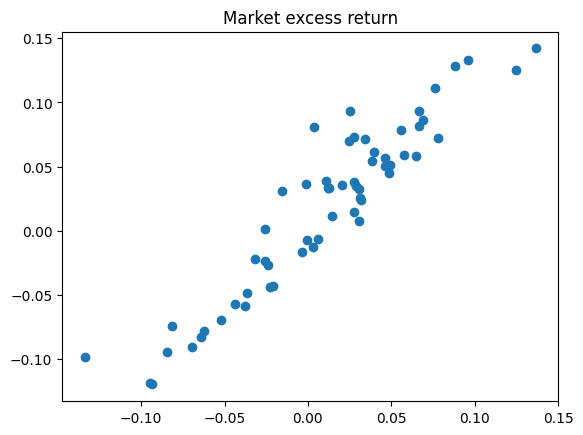

In [74]:
# plot Mkt-Rf and excess return
plt.scatter(factors_df['Mkt-RF'], factors_df['excess_return'])
plt.title('Market excess return')
plt.show()

In [72]:
# create the capm model
X_capm = factors_df['Mkt-RF']
X_capm = sm.add_constant(X_capm)

model_capm = sm.OLS(y, X_capm).fit()
model_capm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          excess_return   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     431.2
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           2.92e-28
Time:                        12:05:40   Log-Likelihood:                 139.89
No. Observations:                  59   AIC:                            -275.8
Df Residuals:                      57   BIC:                            -271.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0064      0.003      2.085      0.042       0.000       0.012
Mkt-RF         1.1345      0.055     20.766      0.000       1.025       1.244
==============================================================================
Omnibus:                       11.422   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.644
Skew:                           1.043   Prob(JB):                      0.00296
Kurtosis:                       3.618   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion from CAPM and Comparison
CAPM R-squared and Adj. R-squared are lower than that of Fama French. Fama French explains more of the variance.
